<a href="https://colab.research.google.com/github/harbenml/alpaka-detector/blob/main/alpaka_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 9.4MB/s 
     |████████████████████████████████| 1.2MB 19.2MB/s 
     |████████████████████████████████| 194kB 47.6MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 776.8MB 26kB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 12.8MB 69kB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.


In [2]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 2.5MB 12.5MB/s 
     |████████████████████████████████| 245kB 40.7MB/s 
     |████████████████████████████████| 552kB 52.3MB/s 
     |████████████████████████████████| 122kB 29.2MB/s 
     |████████████████████████████████| 430kB 62.8MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
ERROR: nbdev 1.1.13 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [1]:
import os 
import sys
import subprocess

REPO_LOCATION = 'https://github.com/harbenml/alpaka-detector.git'
REPO_NAME = 'alpaka-detector'
REPO_BRANCH = 'master'

# Clone the repository
print('cloning the repository')
subprocess.call(['git', 'clone', REPO_LOCATION])

cloning the repository


0

In [7]:
# Setting env variables
print('set path to repository')
sys.path.append(REPO_NAME)

# Change folder and create data folder where the MNIST data will be downloaded
%cd alpaka-detector/

set path to repository
/content/alpaka-detector


In [4]:
%ls

alpaka-detector/  sample_data/


In [5]:
from fastbook import *
from fastai.vision.widgets import *

In [8]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [9]:
learn_inf = load_learner(path/'export.pkl')

In [10]:
learn_inf.dls.vocab

['alpaca', 'sheep']

In [11]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [13]:
btn_upload.data[-1]

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x12\x12\x15\x13\x12\x12\x15\x16\x15\x15\x16\x17\x15\x16\x17\x15\x17\x16\x15\x17\x17\x18\x18\x15\x16\x17\x17\x17\x15\x18\x18\x1d( \x18\x1a%\x1b\x16\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1a-% %--------------------------------------------------\xff\xc0\x00\x11\x08\x00\xe0\x00\xe0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x01\x02\x03\x05\x06\x00\x07\x08\xff\xc4\x009\x10\x00\x01\x03\x02\x04\x04\x05\x02\x04\x06\x01\x05\x01\x00\x00\x00\x01\x00\x02\x11\x03!\x04\x121A\x05\x06Qa\x13"q\x81\x91\xa1\xf02R\xb1\xc1\x07\x14B\xd1\xe1\xf1\xa2\x153S\x82\x92#\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\x05\xff\xc4\x00$\x11\x00\x02\x02\x02\x02\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11!1\x03\x12\x04Q\x13A"Ba\xb12\xff\xda\

In [15]:
img = PILImage.create(btn_upload.data[-1])

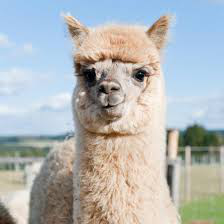

In [16]:
img

In [17]:
pred, pred_idx, probs = learn_inf.predict(img)
pred, pred_idx, probs

('alpaca', tensor(0), tensor([0.9947, 0.0053]))